In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\EDA\\assignment 4\\lead.csv")

In [3]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


### Q1 : Provide Propoer encoding to all the required features in the dataset ?

In [4]:
df = pd.get_dummies(data=data, columns = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])
df.head()

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,NNVBBKZB,73,RG268,43,1045696,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
1,IDD62UNG,30,RG277,32,581988,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,HD3DSEMC,56,RG268,26,1484315,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
3,BF3NC7KV,34,RG270,19,470454,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,TEASRWXV,30,RG282,33,886787,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0


In [5]:
# Identifying variables with integer datatype
df.dtypes

ID                          object
Age                          int64
Region_Code                 object
Vintage                      int64
Avg_Account_Balance          int64
Is_Lead                      int64
Gender_Female                uint8
Gender_Male                  uint8
Occupation_Entrepreneur      uint8
Occupation_Other             uint8
Occupation_Salaried          uint8
Occupation_Self_Employed     uint8
Channel_Code_X1              uint8
Channel_Code_X2              uint8
Channel_Code_X3              uint8
Channel_Code_X4              uint8
Credit_Product_No            uint8
Credit_Product_Yes           uint8
Is_Active_No                 uint8
Is_Active_Yes                uint8
dtype: object

In [6]:
# isolating numerical datatypes
numerical = df.select_dtypes(include=['int64','uint8'])[:]
numerical.dtypes

Age                         int64
Vintage                     int64
Avg_Account_Balance         int64
Is_Lead                     int64
Gender_Female               uint8
Gender_Male                 uint8
Occupation_Entrepreneur     uint8
Occupation_Other            uint8
Occupation_Salaried         uint8
Occupation_Self_Employed    uint8
Channel_Code_X1             uint8
Channel_Code_X2             uint8
Channel_Code_X3             uint8
Channel_Code_X4             uint8
Credit_Product_No           uint8
Credit_Product_Yes          uint8
Is_Active_No                uint8
Is_Active_Yes               uint8
dtype: object

### Q2 : Plot correlation matrix for the data ?

In [7]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
Age,1.000000,0.631242,0.145232,0.230814,-0.152076,0.152076,0.028095,0.394834,-0.563227,0.152652,-0.664600,0.273153,0.456338,0.009252,-0.246636,0.129865,-0.218770,0.218770
Vintage,0.631242,1.000000,0.167433,0.279642,-0.146380,0.146380,0.073515,0.155663,-0.410109,0.221024,-0.571828,0.144931,0.538829,-0.162419,-0.235752,0.095078,-0.209356,0.209356
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370,-0.022477,0.022477,0.035203,0.060387,-0.071691,0.003467,-0.098179,0.010163,0.106906,-0.027096,-0.070495,0.046030,-0.076637,0.076637
Is_Lead,0.230814,0.279642,0.053370,1.000000,-0.072068,0.072068,0.104280,0.011509,-0.117351,0.076042,-0.292903,0.131505,0.190141,0.003792,-0.459025,0.117709,-0.085723,0.085723
Gender_Female,-0.152076,-0.146380,-0.022477,-0.072068,1.000000,-1.000000,-0.017630,-0.025818,0.122439,-0.085863,0.184372,-0.116018,-0.080782,-0.019916,0.077313,-0.042976,0.064207,-0.064207
Gender_Male,0.152076,0.146380,0.022477,0.072068,-1.000000,1.000000,0.017630,0.025818,-0.122439,0.085863,-0.184372,0.116018,0.080782,0.019916,-0.077313,0.042976,-0.064207,0.064207
Occupation_Entrepreneur,0.028095,0.073515,0.035203,0.104280,-0.017630,0.017630,1.000000,-0.066228,-0.067435,-0.087424,-0.075128,0.027859,0.053577,0.004105,-0.124845,0.074811,-0.010250,0.010250
Occupation_Other,0.394834,0.155663,0.060387,0.011509,-0.025818,0.025818,-0.066228,1.000000,-0.407017,-0.527661,-0.104278,0.000466,0.119213,-0.014854,-0.032939,0.016770,-0.028119,0.028119
Occupation_Salaried,-0.563227,-0.410109,-0.071691,-0.117351,0.122439,-0.122439,-0.067435,-0.407017,1.000000,-0.537284,0.590747,-0.323820,-0.307399,-0.061205,0.183908,-0.112922,0.207638,-0.207638
Occupation_Self_Employed,0.152652,0.221024,0.003467,0.076042,-0.085863,0.085863,-0.087424,-0.527661,-0.537284,1.000000,-0.434991,0.293304,0.163663,0.069401,-0.113612,0.073321,-0.164130,0.164130


### Q3: Identify the most correlated features in the data ?

<AxesSubplot:>

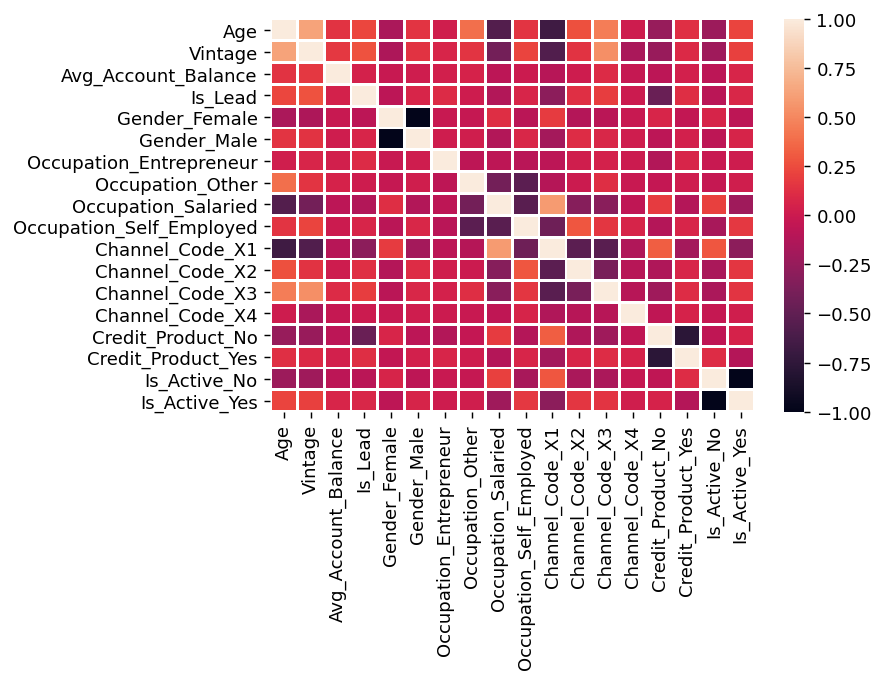

In [8]:
plt.figure(dpi=130)
sns.heatmap(correlation, linewidths = 1,annot = False)

### Age and Vintage have  A strong positive relationship
### Greater the age Greater is the vintage

### Q 4: Plot paired plot for right set of features ?

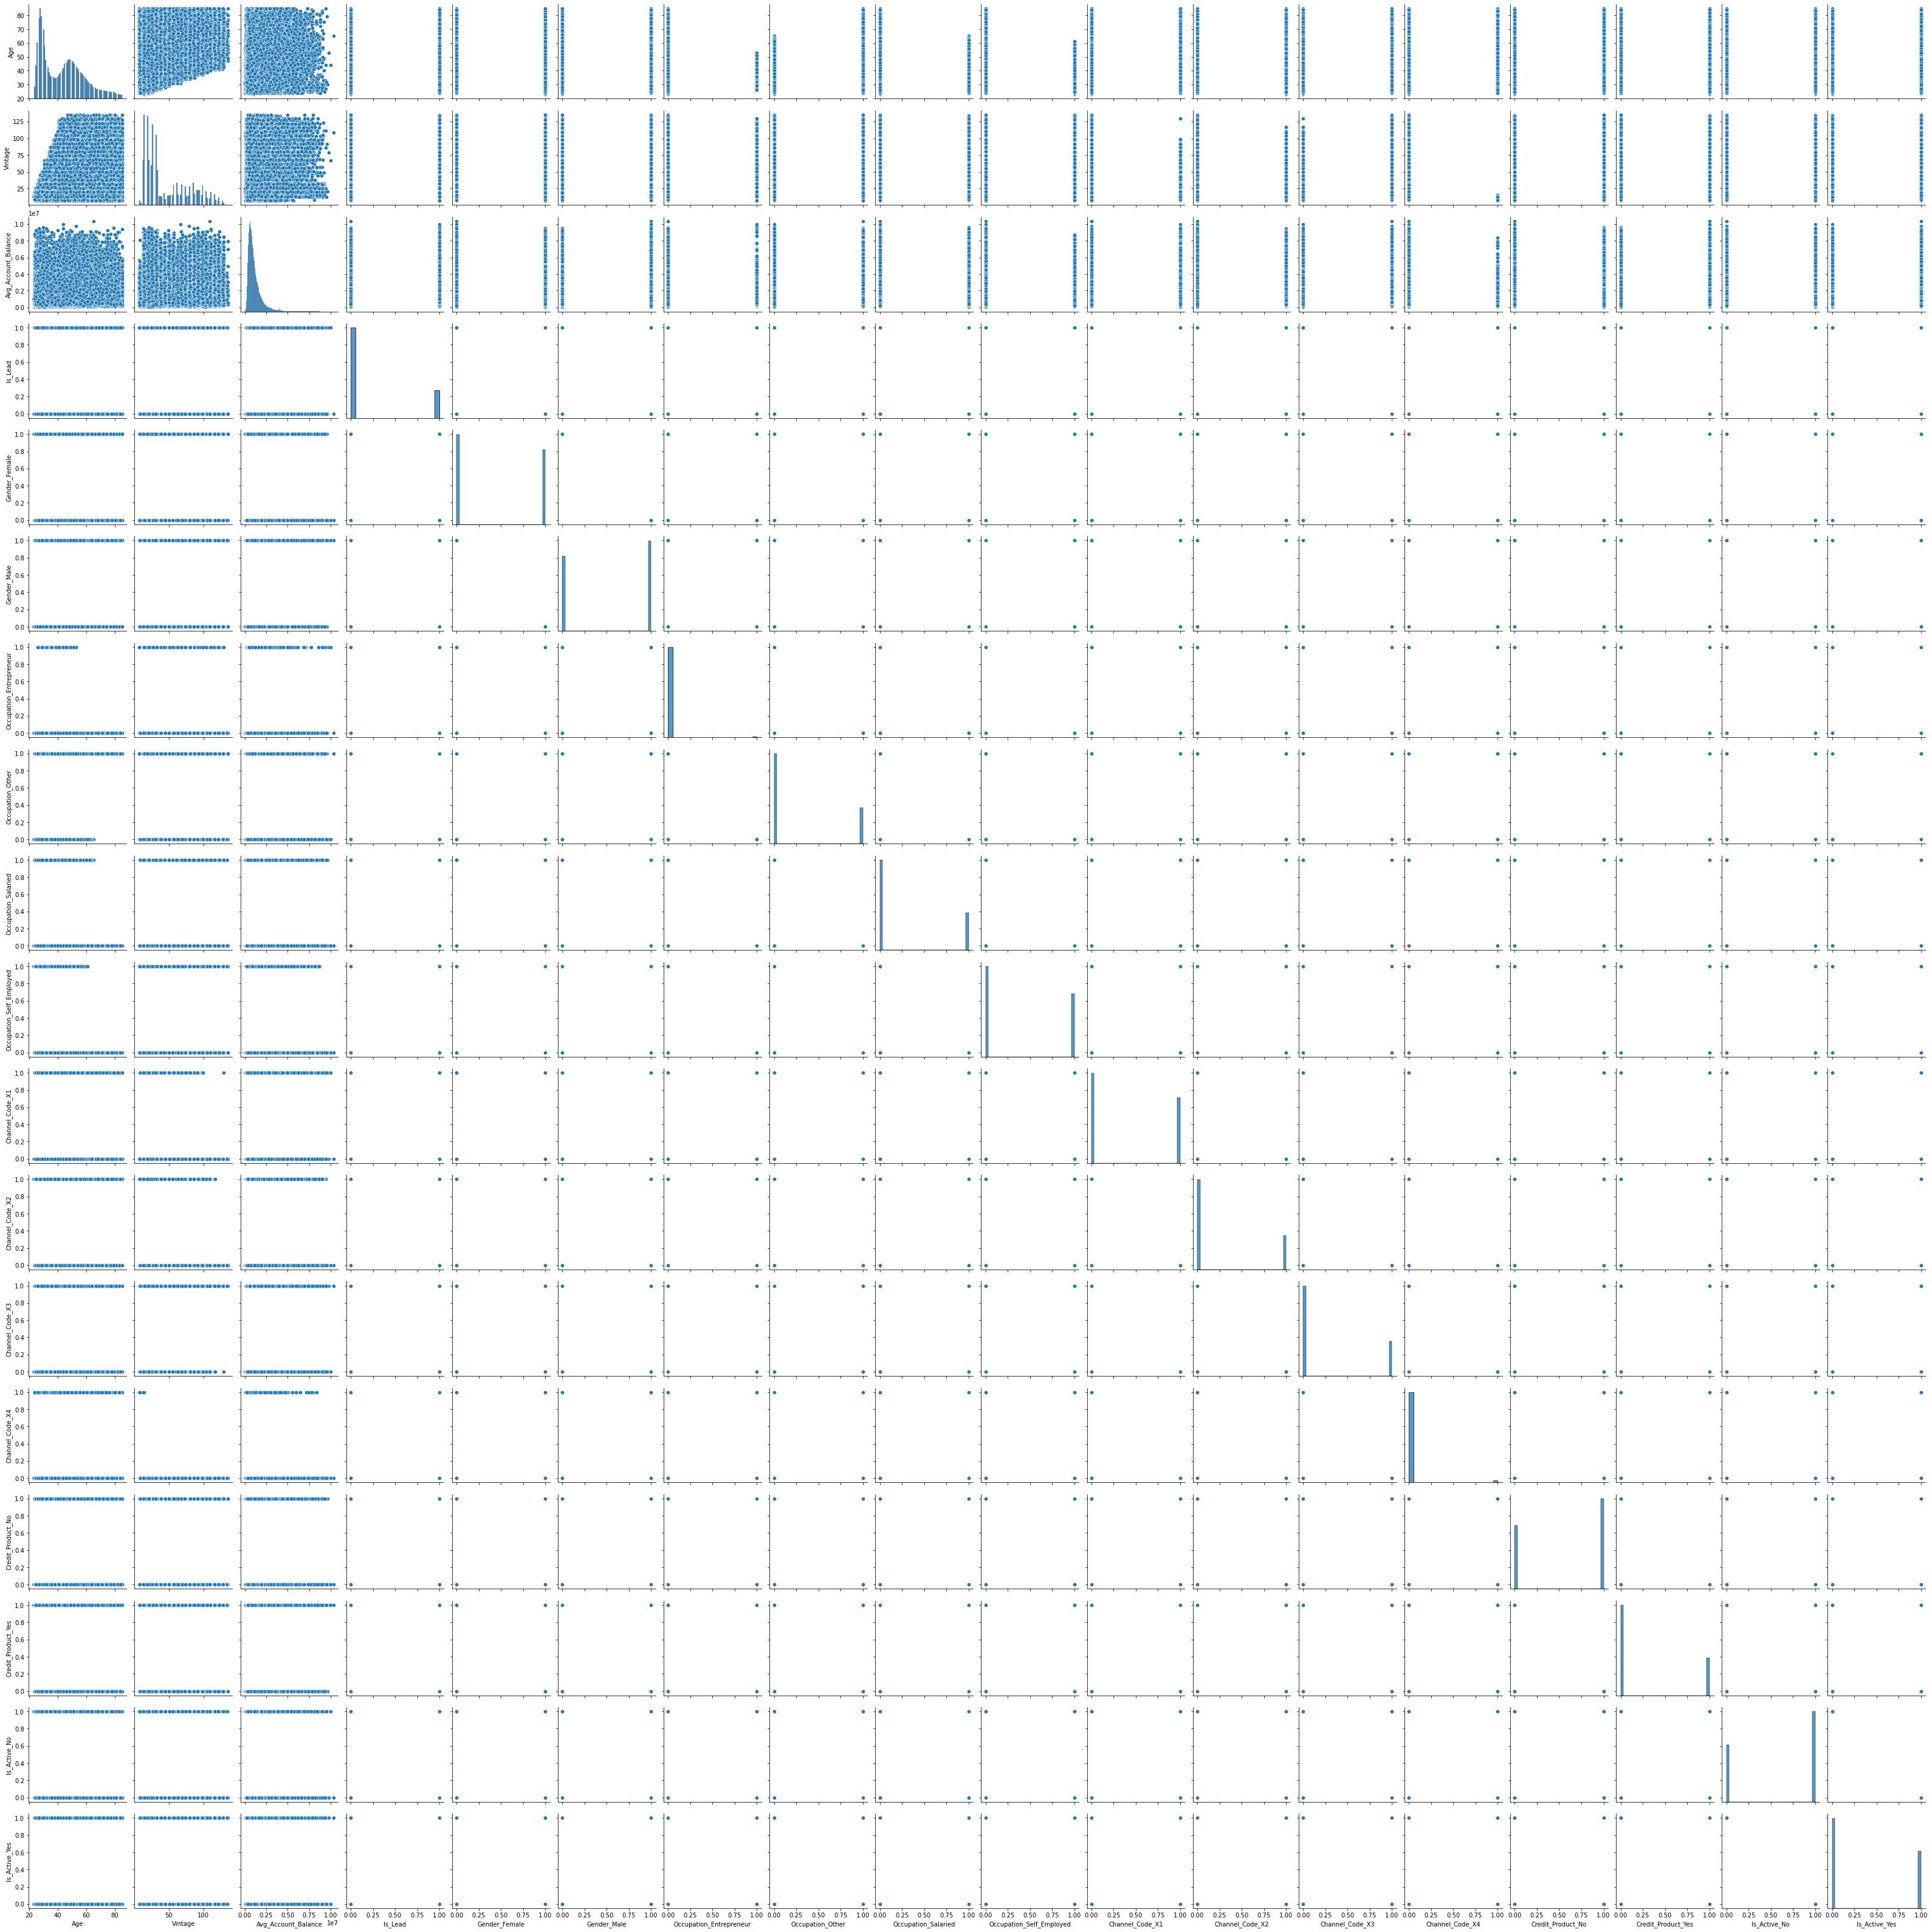

In [10]:
sns.pairplot(df)